In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#distance
import gower

# 
import importlib
import utils
importlib.reload(utils)
import preprocessing
importlib.reload(preprocessing)

# preprocessing tools
from sklearn.neighbors import LocalOutlierFactor


In [8]:
df = preprocessing.load_dataset()

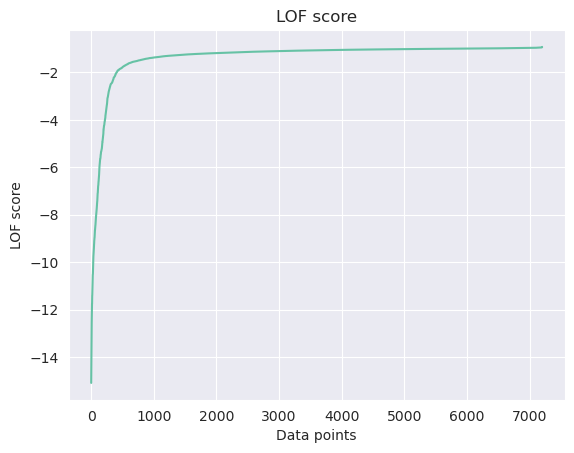

In [48]:
# Apply the algorithm

# set the number of neighbors
n_neighbors = 15
# initialize the model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination='auto')
# fit the model
lof.fit(df)
# compute the LOF scores

lof_scores = lof.negative_outlier_factor_ ## are scores or distances

predictions = lof.fit_predict(df)
# sort the LOF scores
lof_scores_sorted = np.sort(lof_scores)
# plot the LOF scores
#plt.plot(lof_scores)
plt.plot(lof_scores_sorted)
plt.xlabel('Data points')
plt.ylabel('LOF score')
plt.title('LOF score')
plt.show()

In [49]:
np.sum(lof_scores < -6)

131

In [50]:
outlier_indices = np.array([0 if i ==False else -1 for i in -1 * (lof_scores < -6)])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.023s...
[t-SNE] Computed neighbors for 7200 samples in 0.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.383499
[t-SNE] KL divergence after 1000 iterations: 0.980825


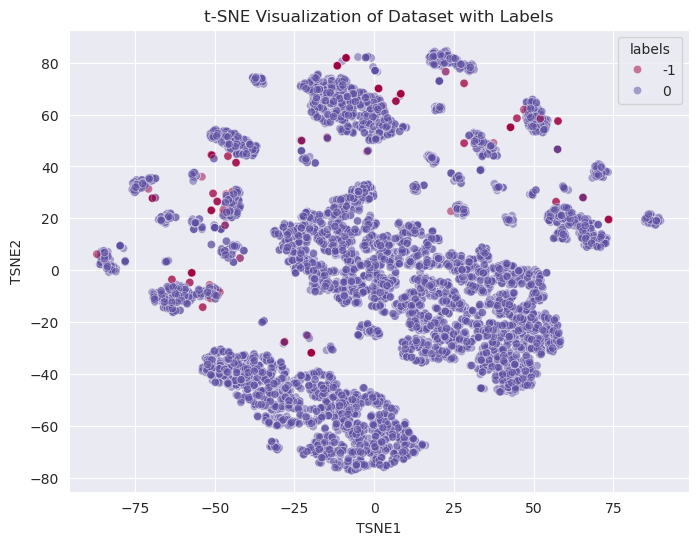

In [51]:
utils.plot_TSNE(df, labels=outlier_indices, dist_matrix=gower.gower_matrix(df))